# 제1장 다변량 시각화

## Python을 이용한 기술통계량 구하기

In [50]:
import numpy as np
import pandas as pd

In [51]:
survey=pd.read_csv('./data/survey.csv')
survey.head(3) # survey.head() : 기본으로 5개 survey.head(5)와 동일

,seq,sex,marriage,age,job,edu,salary
0,1,1,1,21,1,4,60
1,2,1,1,22,5,5,100
2,3,1,1,33,1,4,200


In [52]:
# 평균 구하기
survey["age"].mean() # survey.age.mean()과 동일

34.275

In [53]:
# 표준편차 구하기
survey["age"].std()

11.602359397542536

In [54]:
# 범주형 변수로 변환하기
survey["sex"] = survey["sex"].astype("category")
survey["job"] = survey["job"].astype("category")
survey["edu"] = survey["edu"].astype("category")
survey.marriage = survey.marriage.astype("category")
survey.marriage.head()

0    1
1    1
2    1
3    2
4    2
Name: marriage, dtype: category
Categories (3, int64): [1, 2, 3]

In [55]:
# 연속인 변수의 기술통계량 구하기
survey.iloc[:, 1:].describe()

,age,salary
count,40.000000,40.00000
mean,34.275000,130.22500
std,11.602359,72.19258
min,20.000000,50.00000
25%,24.750000,77.50000
50%,32.000000,105.00000
75%,42.500000,175.00000
max,59.000000,349.00000


In [56]:
#나이에 대한 (성별, 결혼상태, 성별x결혼상태) 평균 및 표준편차
agestat_by_sex = survey.groupby("sex")["age"].describe()
print(agestat_by_sex)
agestat_by_sex["mean"] # 표준편차 : std

     count       mean        std   min   25%   50%   75%   max
sex                                                           
1     27.0  33.962963  11.969453  20.0  24.0  32.0  43.0  59.0
2     13.0  34.923077  11.243232  21.0  26.0  33.0  41.0  56.0


sex
1    33.962963
2    34.923077
Name: mean, dtype: float64

In [57]:
# (sex, marriage)를 그룹으로 age의 기술통계량 구하기
agestat_by_sex_marriage = survey.groupby(["sex","marriage"])["age"].describe()
print(agestat_by_sex_marriage)
agestat_by_sex_marriage["mean"] # 표준편차 : std


              count       mean        std   min    25%   50%    75%   max
sex marriage                                                             
1   1          10.0  24.800000   4.709329  20.0  21.00  23.5  26.75  33.0
    2          15.0  37.866667  11.230486  22.0  31.00  34.0  46.50  56.0
    3           2.0  50.500000  12.020815  42.0  46.25  50.5  54.75  59.0
2   1           5.0  24.400000   3.209361  21.0  22.00  24.0  26.00  29.0
    2           8.0  41.500000   9.071147  27.0  37.50  41.0  46.75  56.0


sex  marriage
1    1           24.800000
     2           37.866667
     3           50.500000
2    1           24.400000
     2           41.500000
Name: mean, dtype: float64

In [58]:
#빈도표 및 분할표(성별, 교육) 
sex_freq = pd.crosstab(index=survey.sex, columns='count')
print(sex_freq)

col_0  count
sex         
1         27
2         13


In [59]:
#빈도표 및 분할표(성별, 교육) 
sex_freq = pd.crosstab(index=survey.sex, columns='count')
print(sex_freq)

col_0  count
sex         
1         27
2         13


In [60]:
# (sex, edu)의 분할표 구하기
sex_edu_table = pd.crosstab(index=survey.sex, columns=survey.edu)
print(sex_edu_table)

edu  1  2  3   4   5
sex                 
1    1  1  1  13  11
2    0  0  2   6   5


In [61]:
# (sex, edu)의 분할표–카이제곱 검정
from scipy.stats import chi2_contingency
chi2_contingency(sex_edu_table)

Chi2ContingencyResult(statistic=2.578097665816964, pvalue=0.6307078881367414, dof=4, expected_freq=array([[ 0.675,  0.675,  2.025, 12.825, 10.8  ],
       [ 0.325,  0.325,  0.975,  6.175,  5.2  ]]))

In [62]:
# 데이터 읽기
survey = pd.read_csv("./data/survey.csv")
survey.head(5)

,seq,sex,marriage,age,job,edu,salary
0,1,1,1,21,1,4,60
1,2,1,1,22,5,5,100
2,3,1,1,33,1,4,200
3,4,2,2,33,7,4,120
4,5,1,2,28,1,4,70


In [63]:
# 빈도수 구하기
edu_freq = pd.crosstab(index=survey.edu, columns='count')
# 케이스 라벨 지정하기
edu_freq.index = ["none", "elementary", "middle", "high", "college"]
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

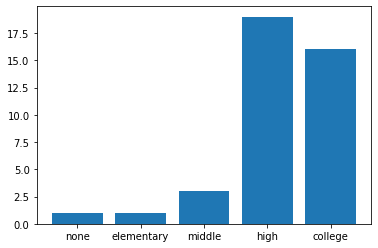

In [64]:
# 막대그림 그리기
plt.bar(edu_freq.index, edu_freq["count"])


([<matplotlib.patches.Wedge at 0x19a154dca30>,
 [Text(1.0966090670054351, 0.08630500658402883, 'none'),
  Text(1.0696069115358542, 0.25678990399688945, 'elementary'),
  Text(0.9379041727177269, 0.5747484343594826, 'middle'),
  Text(-0.7143928570788911, 0.8364465588157197, 'high'),
  Text(0.3399186987098807, -1.0461621663333946, 'college')])

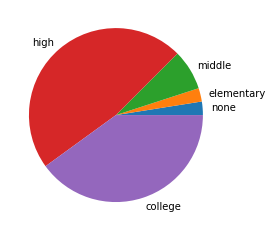

In [65]:
# 원그림 그리기
plt.pie(edu_freq["count"], labels=edu_freq.index) 

In [66]:
# 빈도수 구하기
edu_freq = pd.crosstab(index=survey.edu, columns='count')
edu_freq
# 케이스 라벨 지정하기
edu_freq.index = ["none", "elementary", "middle", "high", "college"]

<BarContainer object of 5 artists>

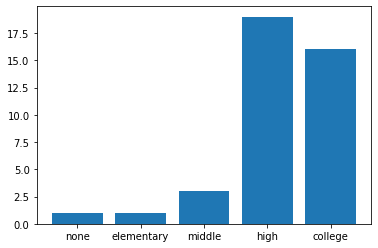

In [67]:
# 막대그림 그리기
plt.bar(edu_freq.index, edu_freq["count"])


([<matplotlib.patches.Wedge at 0x19a14cbbaf0>,
 [Text(1.0966090670054351, 0.08630500658402883, 'none'),
  Text(1.0696069115358542, 0.25678990399688945, 'elementary'),
  Text(0.9379041727177269, 0.5747484343594826, 'middle'),
  Text(-0.7143928570788911, 0.8364465588157197, 'high'),
  Text(0.3399186987098807, -1.0461621663333946, 'college')])

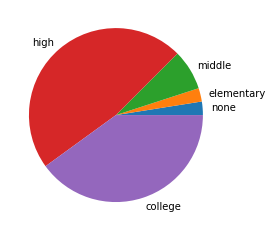

In [69]:
# 원그림 그리기
plt.pie(edu_freq["count"], labels=edu_freq.index) 

<Axes: >

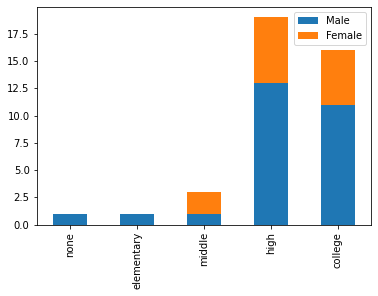

In [71]:
# (edu, sex) 분할표 구하기
edu_sex_tb = pd.crosstab(index=survey.edu, columns=survey.sex)
# 케이스 및 변수이름 지정하기
edu_sex_tb.index = ["none", "elementary", "middle", "high", "college"]
edu_sex_tb.columns = ["Male", "Female"]

# 겹친 막대그림 그리기
edu_sex_tb.plot.bar(stacked=True)


([<matplotlib.patches.Wedge at 0x19a1560e670>,
 [Text(1.0966090670054351, 0.08630500658402883, 'none'),
  Text(1.0696069115358542, 0.25678990399688945, 'elementary'),
  Text(0.9379041727177269, 0.5747484343594826, 'middle'),
  Text(-0.7143928570788911, 0.8364465588157197, 'high'),
  Text(0.3399186987098807, -1.0461621663333946, 'college')])

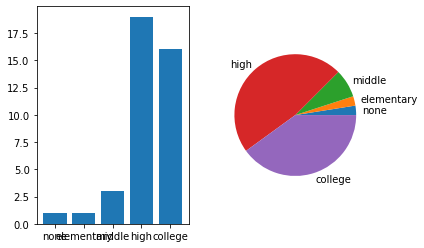

In [73]:
# 한화면에 여러개의 그래프 그리기
plt.figure()
plt.subplot(121) # 121 1행 2열 1번째
plt.bar(edu_freq.index, edu_freq["count"])
plt.subplot(122) # 121 1행 2열 2번째
plt.pie(edu_freq["count"], labels=edu_freq.index) 

(array([10., 10.,  6.,  3.,  2.,  5.,  2.,  0.,  1.,  1.]),
 array([ 50. ,  79.9, 109.8, 139.7, 169.6, 199.5, 229.4, 259.3, 289.2,
        319.1, 349. ]),
 <BarContainer object of 10 artists>)

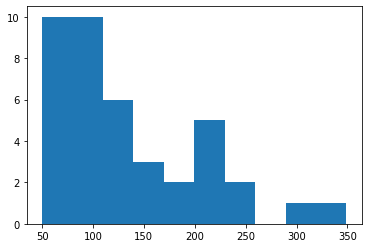

In [75]:
import matplotlib.pyplot as plt
# 히스토그램 그리기
plt.hist(survey["salary"])

(<Figure size 540x180 with 1 Axes>, <Axes: >)

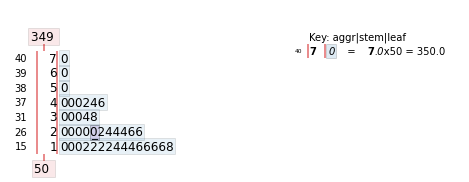

In [77]:
# 줄기-잎 그림 그리기
# pip3 install stemgraphic (in DOS prompt)
import stemgraphic
stemgraphic.stem_graphic(survey.salary, scale=50)

<Axes: xlabel='sex', ylabel='salary'>

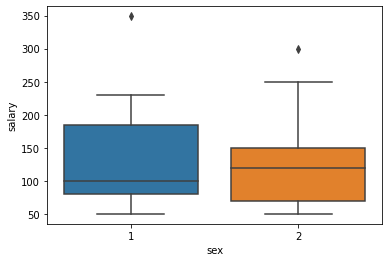

In [79]:
# 상자그림 그리기
import seaborn as sns
sns.boxplot(x="sex", y="salary", data=survey)

## 파이썬 이변량 그래프

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 읽기
co2 = pd.read_csv("./data/co2.csv")
co2.head(2)

,Unnamed: 0,x
0,1,315.42
1,2,316.31


In [82]:
# 변수이름 지정하기
co2.columns = ["seq", "x"]
co2.head(2)

,seq,x
0,1,315.42
1,2,316.31


In [83]:
# 데이터 읽기
USairpollution = pd.read_csv("./data/USairpollution.csv")
USairpollution.head(3)

,state,SO2,temp,manu,popul,wind,precip,predays
0,Albany,46,47.6,44,116,8.8,33.36,135
1,Albuquerque,11,56.8,46,244,8.9,7.77,58
2,Atlanta,24,61.5,368,497,9.1,48.34,115


In [84]:
# SO2 변숫값 * 5
USairpollution["SO2"] = USairpollution["SO2"] * 5 # * 5는 버블의 크기가 작아서 크기를 키우기위해서 사용


Text(0.5, 1.0, 'Bubble plot')

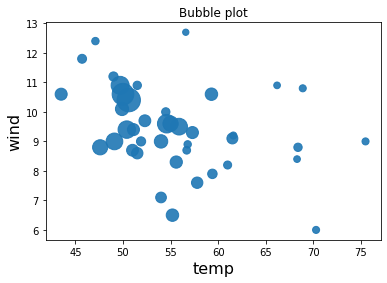

In [85]:
# 버블차트 그리기
plt.scatter('temp', 'wind', s='SO2', alpha=0.9, data=USairpollution)
plt.xlabel("temp", size=16)
plt.ylabel("wind", size=16)
plt.title("Bubble plot")


## 파이썬 산점도 행렬

In [87]:
import pandas as pd
# 데이터 읽기
social = pd.read_csv("./data/social.csv")
# (행의 수, 열의 수)
social.shape

(25, 7)

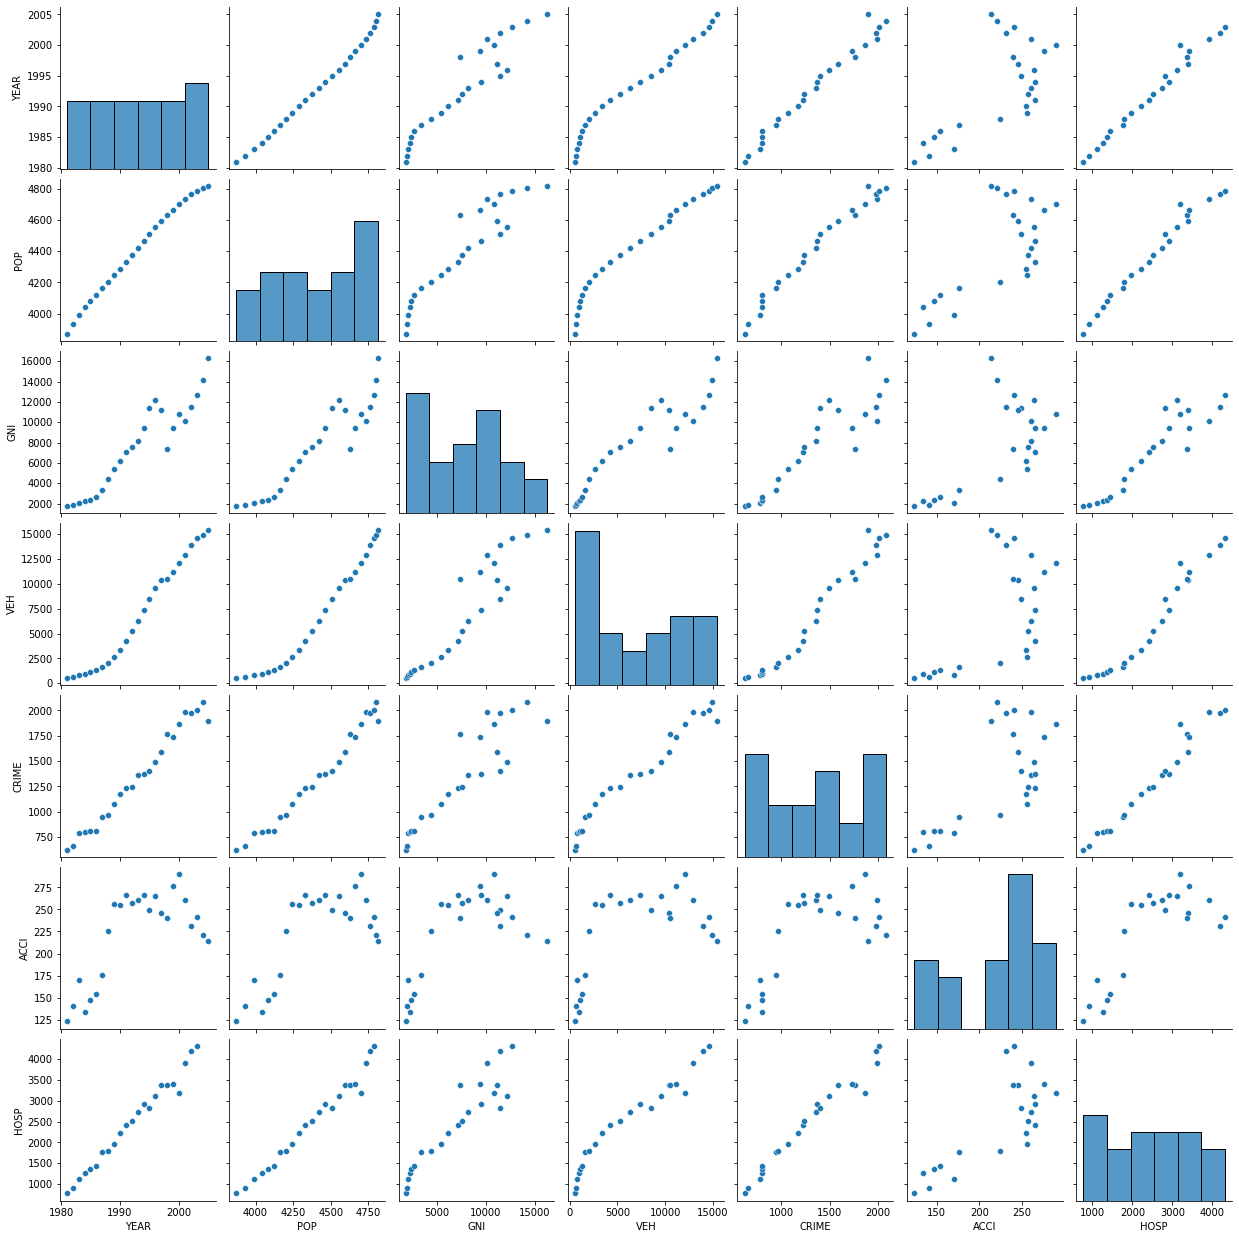

In [88]:
# seaborn을 이용하여 산점도행렬 그리기
import seaborn as sns
sns.pairplot(social)

In [90]:
# 상관계수 행렬 구하기 – 소수점 이하 3자리 반올림
round(social.corr(), 3)

,YEAR,POP,GNI,VEH,CRIME,ACCI,HOSP
YEAR,1.000,0.996,0.948,0.985,0.989,0.680,0.991
POP,0.996,1.000,0.941,0.977,0.989,0.721,0.988
GNI,0.948,0.941,1.000,0.940,0.911,0.676,0.934
VEH,0.985,0.977,0.940,1.000,0.982,0.599,0.972
CRIME,0.989,0.989,0.911,0.982,1.000,0.683,0.983
ACCI,0.680,0.721,0.676,0.599,0.683,1.000,0.770
HOSP,0.991,0.988,0.934,0.972,0.983,0.770,1.000


In [91]:
import seaborn as sns
# seaborn에 내장된 iris 데이터 가져오기
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


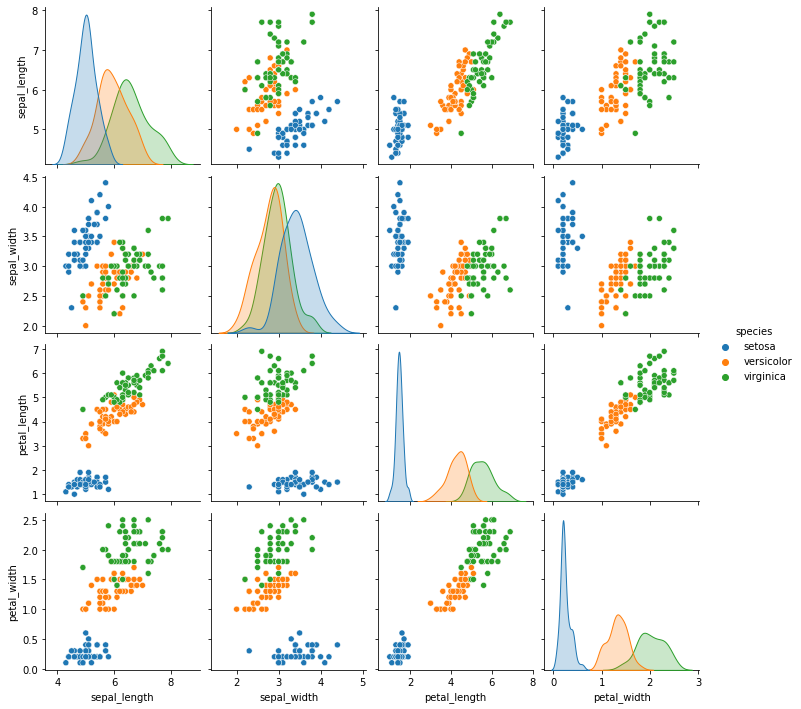

In [92]:
# species로 구분된 산점도행렬 그리기 - 대각선은 각 그룹별 분포
sns.pairplot(iris, hue='species', height=2.5)